<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#(60-pts)-Implement-Pandas-And-Matplotlib" data-toc-modified-id="(60-pts)-Implement-Pandas-And-Matplotlib-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>(60 pts) Implement Pandas And Matplotlib</a></span><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Analyze-Data" data-toc-modified-id="Analyze-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Analyze Data</a></span><ul class="toc-item"><li><span><a href="#(20-pts-+-10-bonus)-Group" data-toc-modified-id="(20-pts-+-10-bonus)-Group-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>(20 pts + 10 bonus) Group</a></span></li><li><span><a href="#(30-pts)-Plot" data-toc-modified-id="(30-pts)-Plot-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>(30 pts) Plot</a></span></li></ul></li></ul></li><li><span><a href="#(50-pts-+-10-pts)-Analyze-Stocks" data-toc-modified-id="(50-pts-+-10-pts)-Analyze-Stocks-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>(50 pts + 10 pts) Analyze Stocks</a></span><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Analyze-Stock" data-toc-modified-id="Analyze-Stock-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Analyze Stock</a></span></li></ul></li></ul></div>

# (60 pts) Implement Pandas And Matplotlib

##### Load Package

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

## Load Data

In [92]:
df = pd.read_csv("weather_by_cities.csv")

In [93]:
df

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy


## Analyze Data

### (20 pts + 10 bonus) Group

* we are going to use group method \
  remember what we discuss the group in the class \
  split --> apply --> combine \
  let me show you these three steps following for understanding

In [94]:
group_city = df.groupby("city")

for city, data in group_city:
    print(city)
    print("\n")
    print(data)

mumbai


        day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
7  1/4/2017  mumbai           92          5   Rain
new york


        day      city  temperature  windspeed  event
0  1/1/2017  new york           32          6   Rain
1  1/2/2017  new york           36          7  Sunny
2  1/3/2017  new york           28         12   Snow
3  1/4/2017  new york           33          7  Sunny
paris


         day   city  temperature  windspeed   event
8   1/1/2017  paris           45         20   Sunny
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
11  1/4/2017  paris           42         10  Cloudy


In [95]:
group_city.get_group("new york")

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny


In [96]:
group_city.max()

,day,temperature,windspeed,event
city,,,,
mumbai,1/4/2017,92,15,Sunny
new york,1/4/2017,36,12,Sunny
paris,1/4/2017,54,20,Sunny


* Question: What was the average temperature in each of these 3 cities ?

In [97]:
########
# please write your answer below
print(group_city.mean())
print(f"The average temperatures in Mumbai, newyork and paris are  {88.50}, {32.25} and {47.75}")
########

          temperature  windspeed
city                            
mumbai          88.50       9.25
new york        32.25       8.00
paris           47.75      12.75
The average temperatures in Mumbai, newyork and paris are  88.5, 32.25 and 47.75


* Question: What was the maximum windspeed in each of these 3 cities ?

In [98]:
########
# please write your answer below
print(group_city.max())

print(f"The maximum wind speed in Mumbai, newyork and paris are  {15}, {12} and {20}")

########

               day  temperature  windspeed  event
city                                             
mumbai    1/4/2017           92         15  Sunny
new york  1/4/2017           36         12  Sunny
paris     1/4/2017           54         20  Sunny
The maximum wind speed in Mumbai, newyork and paris are  15, 12 and 20


* Question: \
  now we group the data according windspeed \
  group(1): days when windspeed was between 1 and 5 \
  group(2): days when windspeed was between 6 and 10 \
  group(3): days when windspeed was between 11 and 20 \
  
  how many days each group has ? \
  hint: for this question you need to customize the group criterion \
  (bouns: 10)

In [99]:
########
# please write your answer below

# create a new column 'wind_speed_group' to group the data by wind speed ranges
df['wind_speed_group'] = pd.cut(df['windspeed'], bins=[1, 5, 10, 20], labels=['group(1)', 'group(2)', 'group(3)'])

# group the data by the wind speed groups
grouped_data = df.groupby('wind_speed_group')

# print the groups and their data
for name, data in grouped_data:
    print(name)
    print(data)
    print('\n')
    
print(f"Group 1 has {2} dataset, Group 2 has {5} dataset and group 3 has {5} dataset")

########

group(1)
        day    city  temperature  windspeed  event wind_speed_group
4  1/1/2017  mumbai           90          5  Sunny         group(1)
7  1/4/2017  mumbai           92          5   Rain         group(1)


group(2)
         day      city  temperature  windspeed   event wind_speed_group
0   1/1/2017  new york           32          6    Rain         group(2)
1   1/2/2017  new york           36          7   Sunny         group(2)
3   1/4/2017  new york           33          7   Sunny         group(2)
10  1/3/2017     paris           54          8  Cloudy         group(2)
11  1/4/2017     paris           42         10  Cloudy         group(2)


group(3)
        day      city  temperature  windspeed   event wind_speed_group
2  1/3/2017  new york           28         12    Snow         group(3)
5  1/2/2017    mumbai           85         12     Fog         group(3)
6  1/3/2017    mumbai           87         15     Fog         group(3)
8  1/1/2017     paris           45         20   S

### (30 pts) Plot

* Question: please plot the temperature curve of three cities in one plot

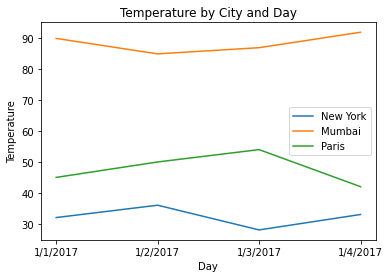

In [100]:
########
# please write your answer below

ny_temps = df[df['city'] == 'new york']['temperature']
mumbai_temps = df[df['city'] == 'mumbai']['temperature']
paris_temps = df[df['city'] == 'paris']['temperature']

# create a figure and axis object
fig, ax = plt.subplots()

# plot the temperature data for each city on the same graph with day on x-axis
ax.plot(df[df['city'] == 'new york']['day'], ny_temps, label='New York')
ax.plot(df[df['city'] == 'mumbai']['day'], mumbai_temps, label='Mumbai')
ax.plot(df[df['city'] == 'paris']['day'], paris_temps, label='Paris')

# set the x-axis label
ax.set_xlabel('Day')

# set the y-axis label
ax.set_ylabel('Temperature')

# set the title
ax.set_title('Temperature by City and Day')

# add a legend
ax.legend()

# show the plot
plt.show()

########

* Question: Please plot the windspeed curve of three cities in one plot

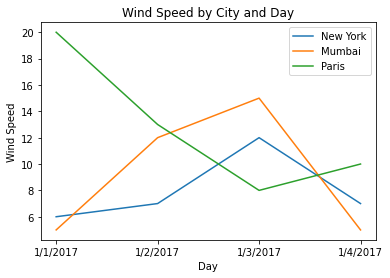

In [101]:
########
# please write your answer below

ny_windspeeds = df[df['city'] == 'new york']['windspeed']
mumbai_windspeeds = df[df['city'] == 'mumbai']['windspeed']
paris_windspeeds = df[df['city'] == 'paris']['windspeed']

# create a figure and axis object
fig, ax = plt.subplots()

# plot the windspeed data for each city on the same graph with day on x-axis
ax.plot(df[df['city'] == 'new york']['day'], ny_windspeeds, label='New York')
ax.plot(df[df['city'] == 'mumbai']['day'], mumbai_windspeeds, label='Mumbai')
ax.plot(df[df['city'] == 'paris']['day'], paris_windspeeds, label='Paris')

# set the x-axis label
ax.set_xlabel('Day')

# set the y-axis label
ax.set_ylabel('Wind Speed')

# set the title
ax.set_title('Wind Speed by City and Day')

# add a legend
ax.legend()

# show the plot
plt.show()

########

* Question: use bar chart to reflect the average temperature of three cities

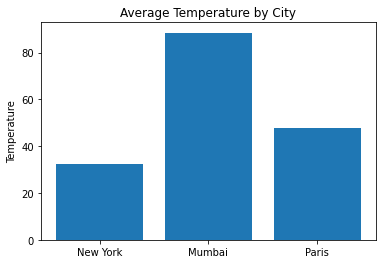

In [102]:
########
# please write your answer below
ny_avg_temp = df[df['city'] == 'new york']['temperature'].mean()
mumbai_avg_temp = df[df['city'] == 'mumbai']['temperature'].mean()
paris_avg_temp = df[df['city'] == 'paris']['temperature'].mean()

# create a figure and axis object
fig, ax = plt.subplots()

# create a bar chart of the average temperature for each city
ax.bar(['New York', 'Mumbai', 'Paris'], [ny_avg_temp, mumbai_avg_temp, paris_avg_temp])

# set the y-axis label
ax.set_ylabel('Temperature')

# set the title
ax.set_title('Average Temperature by City')

# show the plot
plt.show()

########

* Question: use pie chart to reflect the propotion of event for each city

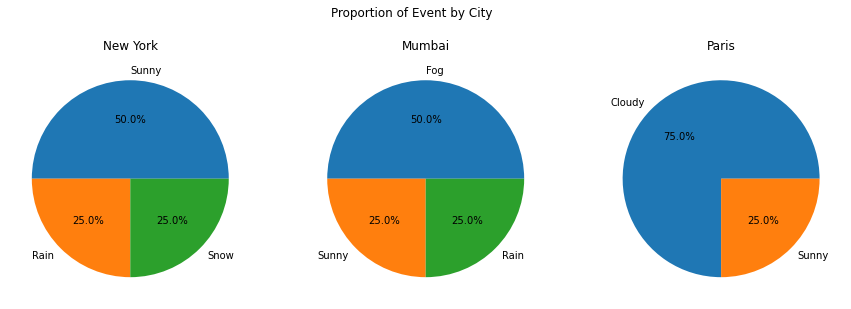

In [103]:
########
# please write your answer below
ny_events = df[df['city'] == 'new york']['event'].value_counts(normalize=True)
mumbai_events = df[df['city'] == 'mumbai']['event'].value_counts(normalize=True)
paris_events = df[df['city'] == 'paris']['event'].value_counts(normalize=True)

# create a figure and axis object
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# create a pie chart of the proportion of each event for New York
axs[0].pie(ny_events, labels=ny_events.index, autopct='%1.1f%%')
axs[0].set_title('New York')

# create a pie chart of the proportion of each event for Mumbai
axs[1].pie(mumbai_events, labels=mumbai_events.index, autopct='%1.1f%%')
axs[1].set_title('Mumbai')

# create a pie chart of the proportion of each event for Paris
axs[2].pie(paris_events, labels=paris_events.index, autopct='%1.1f%%')
axs[2].set_title('Paris')

# set the title
fig.suptitle('Proportion of Event by City')

# show the plot
plt.show()


########

# (50 pts + 10 pts) Analyze Stocks

## Load Data

* Question: pick three stocks you are interested in and download their data \
  also pick your favourite one year

In [104]:
#!pip install yfinance

In [105]:
import yfinance as yf

In [106]:
# this is an example 
# here I donwload the apple data from 2020-01-01 to 2021-01-01

tickers = ["AAPL", "GOOGL", "NVDA"]
start_date = "2020-01-01"
end_date = "2021-01-01"

data = yf.download(tickers, start=start_date, end=end_date)

data

[*********************100%***********************]  3 of 3 completed


Adj Close                              Close             \
                  AAPL      GOOGL        NVDA        AAPL      GOOGL   
Date                                                                   
2020-01-02   73.449394  68.433998   59.760399   75.087502  68.433998   
2020-01-03   72.735298  68.075996   58.803879   74.357498  68.075996   
2020-01-06   73.314888  69.890503   59.050480   74.949997  69.890503   
2020-01-07   72.970085  69.755501   59.765377   74.597504  69.755501   
2020-01-08   74.143883  70.251999   59.877476   75.797501  70.251999   
...                ...        ...         ...         ...        ...   
2020-12-24  130.205765  86.708000  129.680817  131.970001  86.708000   
2020-12-28  134.862686  88.697998  128.745148  136.690002  88.697998   
2020-12-29  133.067001  87.888000  129.176788  134.869995  87.888000   
2020-12-30  131.932388  86.812500  131.197800  133.720001  86.812500   
2020-12-31  130.916138  87.632004  130.292114  132.690002  87.632004   

                              High                                Low  \
                  NVDA        AAPL      GOOGL        NVDA        AAPL   
Date                                                                    
2020-01-02   59.977501   75.150002  68.433998   59.977501   73.797501   
2020-01-03   59.017502   75.144997  68.687500   59.457500   74.125000   
2020-01-06   59.264999   74.989998  69.916000   59.317501   73.187500   
2020-01-07   59.982498   75.224998  70.175003   60.442501   74.370003   
2020-01-08   60.095001   76.110001  70.592499   60.509998   74.290001   
...                ...         ...        ...         ...         ...   
2020-12-24  129.937500  133.460007  87.120499  131.324997  131.100006   
2020-12-28  129.000000  137.339996  89.349998  130.625000  133.509995   
2020-12-29  129.432495  138.789993  89.423500  130.725006  134.339996   
2020-12-30  131.457504  135.990005  88.388000  132.137497  133.399994   
2020-12-31  130.550003  134.740005  87.875000  131.509995  131.720001   

                                         Open                         \
                GOOGL        NVDA        AAPL      GOOGL        NVDA   
Date                                                                   
2020-01-02  67.324501   59.180000   74.059998  67.420502   59.687500   
2020-01-03  67.365997   58.525002   74.287498  67.400002   58.775002   
2020-01-06  67.550003   57.817501   73.447502  67.581497   58.080002   
2020-01-07  69.578003   59.097500   74.959999  70.023003   59.549999   
2020-01-08  69.631500   59.537498   74.290001  69.740997   59.939999   
...               ...         ...         ...        ...         ...   
2020-12-24  86.217499  129.387497  131.320007  86.449997  130.372498   
2020-12-28  87.091003  127.632500  133.990005  87.245499  130.625000   
2020-12-29  87.755501  128.422501  138.050003  89.361504  129.250000   
2020-12-30  86.400002  128.967499  135.580002  88.250000  129.902496   
2020-12-31  86.804497  129.149994  134.080002  86.863503  131.365005   

               Volume                      
                 AAPL     GOOGL      NVDA  
Date                                       
2020-01-02  135480400  27278000  23753600  
2020-01-03  146322800  23408000  20538400  
2020-01-06  118387200  46768000  26263600  
2020-01-07  108872000  34330000  31485600  
2020-01-08  132079200  35314000  27710800  
...               ...       ...       ...  
2020-12-24   54930100   9312000   9788400  
2020-12-28  124486200  27650000  21256400  
2020-12-29  121047300  19726000  17037200  
2020-12-30   96452100  21026000  22539600  
2020-12-31   99116600  21070000  19242400  

[253 rows x 18 columns]

## Analyze Stock

* Question: plot the daily close price \
  give appropriate labels 

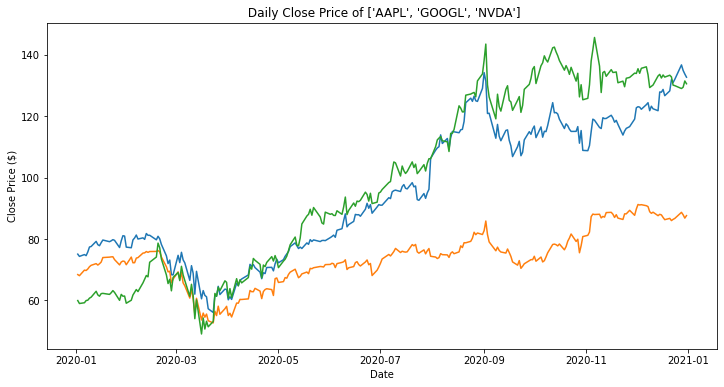

In [107]:
########
# Apple Plot

plt.subplots(figsize=(12, 6))
plt.plot(data.index, data["Close"])
plt.title(f" Daily Close Price of {tickers}")
plt.xlabel("Date")
plt.ylabel("Close Price ($)")
plt.show()
########

* Question: visualize the volume

Text(0, 0.5, 'Volume ($)')

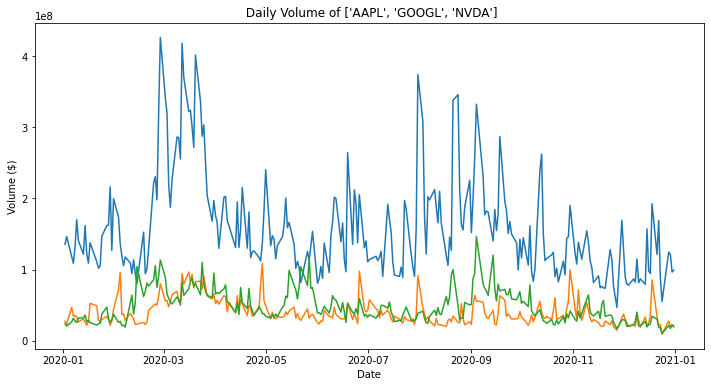

In [108]:
plt.subplots(figsize=(12, 6))
plt.plot(data.index, data["Volume"])
plt.title(f" Daily Volume of {tickers}")
plt.xlabel("Date")
plt.ylabel("Volume ($)")

* Question: visualize the returns

[*********************100%***********************]  3 of 3 completed


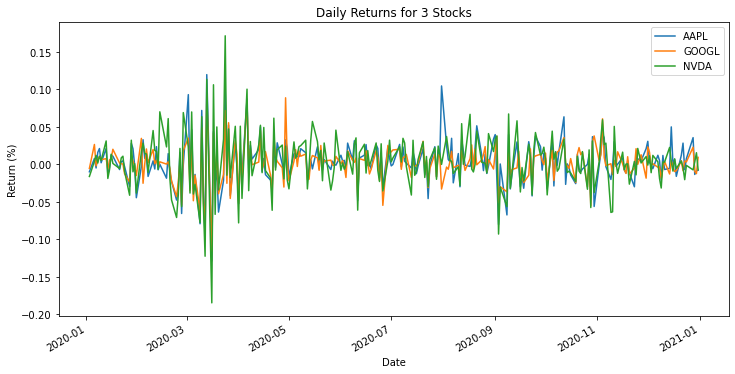

In [109]:
########
# please write your answer below

tickers = ["AAPL", "GOOGL", "NVDA"]
start_date = "2020-01-01"
end_date = "2021-01-01"
data = yf.download(tickers, start=start_date, end=end_date)["Close"]

# Calculate the daily returns for each stock
returns = pd.DataFrame()
for ticker in tickers:
    returns[ticker] = data[ticker].pct_change()

# Create a line plot of the daily returns for each stock
returns.plot(figsize=(12, 6))
plt.title("Daily Returns for 3 Stocks")
plt.xlabel("Date")
plt.ylabel("Return (%)")
plt.legend(tickers)
plt.show()
########

In [110]:
aapl.head()

,Open,High,Low,Close,Adj Close,Volume,MA50,MA100
Date,,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.449394,135480400,NaN,NaN
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.735313,146322800,NaN,NaN
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.314880,118387200,NaN,NaN
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.970085,108872000,NaN,NaN
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.143898,132079200,NaN,NaN


* Question: plot the histogram of return

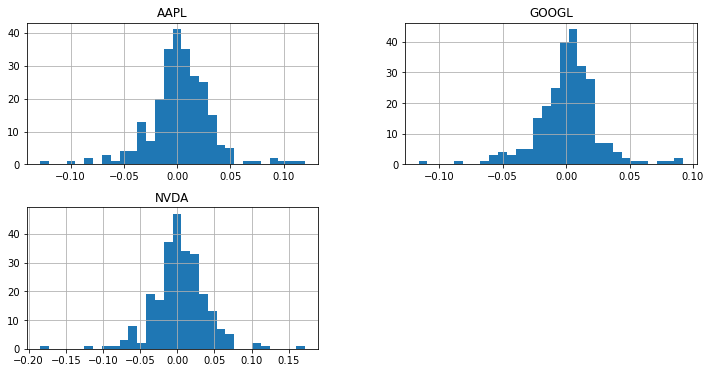

In [111]:
########
# please write returns.hist(bins=30, figsize=(10, 6))
returns.hist(bins=30, figsize=(12, 6))
plt.title("Histogram of Daily Returns for 3 Stocks")
plt.xlabel("Return (%)")
plt.ylabel("Frequency")
plt.legend(tickers)
plt.show()

########

* Question: observe trend \
  compare one stock price with its 50-day average and 100-day average

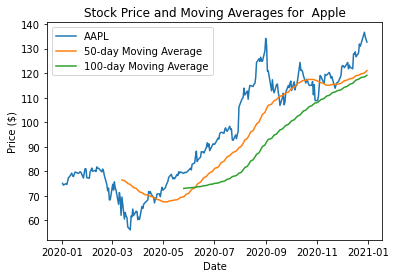

In [112]:
########
# please write your answer below
aapl['MA50'] = aapl['Close'].rolling(window=50).mean()
aapl['MA100'] = aapl['Close'].rolling(window=100).mean()

# Plot the stock price data along with the moving averages
plt.plot(data.index, aapl['Close'], label="AAPL")
plt.plot(data.index, aapl['MA50'], label='50-day Moving Average')
plt.plot(data.index, aapl['MA100'], label='100-day Moving Average')
plt.title("Stock Price and Moving Averages for  Apple")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()
########

* Question: suppose you build a portfolio that comprised by the three stocks and the weight of stocks is equal. \
  plot the cumulative return of this portfolio

[*********************100%***********************]  3 of 3 completed


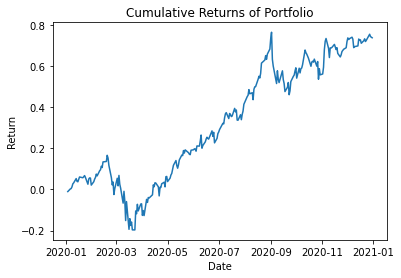

In [113]:
tickers = ["AAPL", "GOOGL", "NVDA"]
weights = [1/3, 1/3, 1/3]

# Download the historical stock price data for the portfolio
start_date = "2020-01-01"
end_date = "2021-01-01"
data = yf.download(tickers, start=start_date, end=end_date)["Close"]

# Calculate the daily returns of the portfolio
returns = pd.DataFrame()
for ticker in tickers:
    returns[ticker] = data[ticker].pct_change()
returns = returns.dropna()

# Calculate the daily portfolio returns
portfolio_returns = returns.dot(weights)

# Calculate the cumulative returns of the portfolio
cumulative_returns = (1 + portfolio_returns).cumprod() - 1

# Plot the cumulative returns of the portfolio
plt.plot(cumulative_returns.index, cumulative_returns)
plt.title("Cumulative Returns of Portfolio")
plt.xlabel("Date")
plt.ylabel("Return")
plt.show()

* Question: change point analysis \
  Change point detection (CPD) is the problem of finding abrupt changes in data when a property of the time series   changes \
  detect the date on which stock's price increase or decrease more than 15% than previous date and visualize them \
  (bonus: 10)

In [114]:
#!pip install ruptures

[*********************100%***********************]  1 of 1 completed


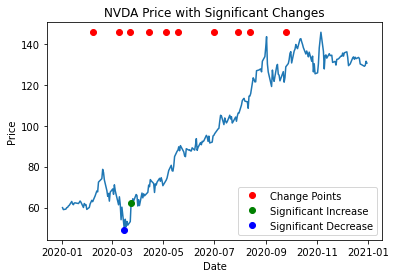

In [115]:
import ruptures as rpt
import numpy as np

# Download the historical stock price data
ticker = "NVDA"
start_date = "2020-01-01"
end_date = "2021-01-01"
data = yf.download(ticker, start=start_date, end=end_date)["Close"]

#Convert the data to numpy array
data_array = data.to_numpy()

# Define the Dynp model
model = "l2"

# Fit the Dynp model to the data
algo = rpt.Dynp(model=model).fit(data_array)

# Detect the change points in the data
result = algo.predict(n_bkps=10)

# Convert the change points to dates
change_dates = [data.index[i] for i in result[:-1]]

# Define the thresholds for price changes
increase_threshold = 0.15
decrease_threshold = -0.15

# Detect the dates of significant price increases or decreases
change_dates_increase = []
change_dates_decrease = []
for i in range(1, len(data)):
    change = (data[i] - data[i-1]) / data[i-1]
    if change > increase_threshold:
        change_dates_increase.append(data.index[i])
    elif change < decrease_threshold:
        change_dates_decrease.append(data.index[i])

# Visualize the results
plt.plot(data.index, data)
plt.plot(change_dates, [data.max()] * len(change_dates), 'ro', label="Change Points")
plt.plot(change_dates_increase, data[change_dates_increase], 'go', label="Significant Increase")
plt.plot(change_dates_decrease, data[change_dates_decrease], 'bo', label="Significant Decrease")
plt.title(f"{ticker} Price with Significant Changes")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()